In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comprehensive-supply-chain-operations-dataset/enhanced_supply_chain_data.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = '../input/comprehensive-supply-chain-operations-dataset/enhanced_supply_chain_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


   OrderID      Product    Warehouse   Supplier  SupplierLeadTime  \
0  ORD1000        Books      Houston  SupplierA                 3   
1  ORD1001    Furniture  Los Angeles  SupplierB                 8   
2  ORD1002  Electronics      Atlanta  SupplierD                 9   
3  ORD1003        Books      Atlanta  SupplierC                 2   
4  ORD1004     Clothing      Chicago  SupplierC                 4   

             OrderDate         DeliveryDate TransportMode    Cost  \
0  2024-01-01 00:00:00  2024-01-03 00:00:00           Air  450.95   
1  2024-01-01 01:00:00  2024-01-03 01:00:00          Rail  273.28   
2  2024-01-01 02:00:00  2024-01-03 02:00:00           Sea  421.13   
3  2024-01-01 03:00:00  2024-01-03 03:00:00           Sea  230.97   
4  2024-01-01 04:00:00  2024-01-03 04:00:00           Air   96.08   

   FreightCost  ...  CustomerPriority CustomerRating InventoryLevel  \
0        49.07  ...            Medium              1            399   
1        93.57  ...         

In [3]:
# Display dataset information
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrderID              1000 non-null   object 
 1   Product              1000 non-null   object 
 2   Warehouse            1000 non-null   object 
 3   Supplier             1000 non-null   object 
 4   SupplierLeadTime     1000 non-null   int64  
 5   OrderDate            1000 non-null   object 
 6   DeliveryDate         1000 non-null   object 
 7   TransportMode        1000 non-null   object 
 8   Cost                 1000 non-null   float64
 9   FreightCost          1000 non-null   float64
 10  Distance             1000 non-null   float64
 11  DeliveryStatus       1000 non-null   object 
 12  CustomerPriority     1000 non-null   object 
 13  CustomerRating       1000 non-null   int64  
 14  InventoryLevel       1000 non-null   int64  
 15  ReorderPoint         1000 non-null   in

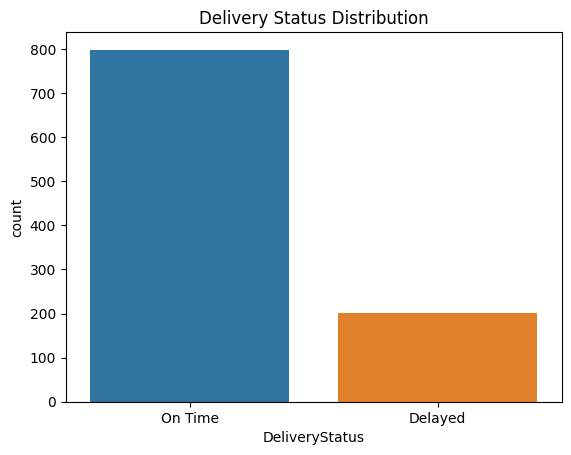

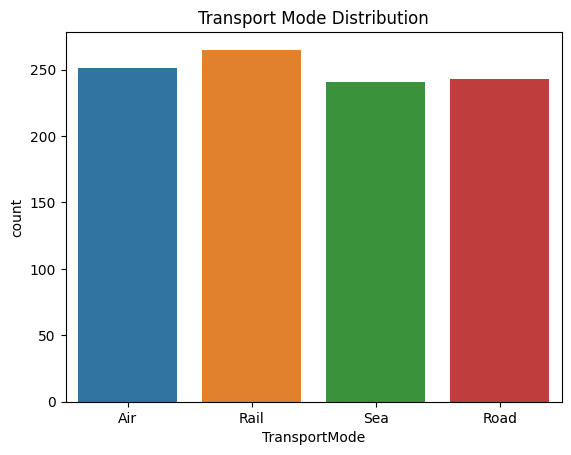

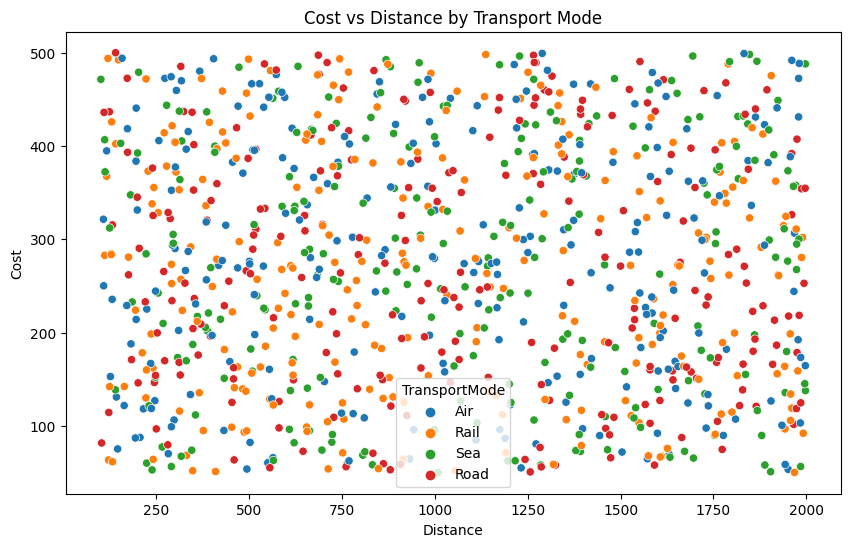

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Delivery Status distribution
sns.countplot(data=data, x='DeliveryStatus')
plt.title('Delivery Status Distribution')
plt.show()

# Transport Mode distribution
sns.countplot(data=data, x='TransportMode')
plt.title('Transport Mode Distribution')
plt.show()

# Relationship between Cost and Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Distance', y='Cost', hue='TransportMode')
plt.title('Cost vs Distance by Transport Mode')
plt.show()


In [5]:
# Average cost by transport mode
print(data.groupby('TransportMode')['Cost'].mean())

# Average delay by warehouse
delayed_data = data[data['DeliveryStatus'] == 'Delayed']
print(delayed_data.groupby('Warehouse')['Distance'].mean())

# Calculate Fill Rate statistics
print(data['FillRate'].describe())


TransportMode
Air     282.388207
Rail    265.967057
Road    269.776996
Sea     274.254689
Name: Cost, dtype: float64
Warehouse
Atlanta         876.513043
Chicago         768.074286
Houston        1311.783871
Los Angeles     971.185000
New York       1148.206000
Name: Distance, dtype: float64
count    1000.000000
mean       90.219680
std         5.806661
min        80.050000
25%        85.400000
50%        90.165000
75%        95.492500
max       100.000000
Name: FillRate, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split

# Select features and target
X = data[['Cost', 'Distance', 'InventoryLevel', 'FillRate', 'CustomerRating']]
y = (data['DeliveryStatus'] == 'Delayed').astype(int)  # Binary classification: Delayed or On Time

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.99      0.91       168
           1       0.50      0.03      0.06        32

    accuracy                           0.84       200
   macro avg       0.67      0.51      0.49       200
weighted avg       0.79      0.84      0.78       200



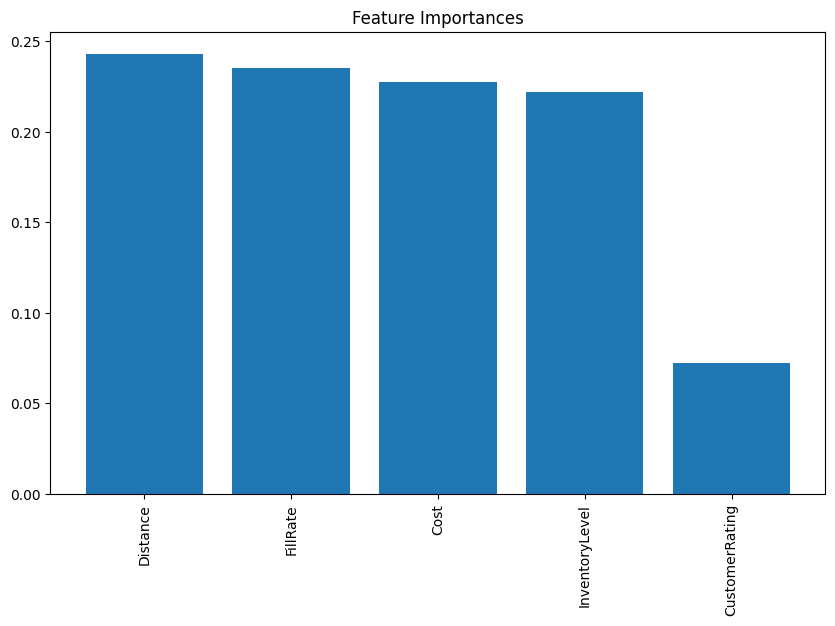

In [8]:
# Feature importance visualization
import numpy as np

importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title('Feature Importances')
plt.show()


                                    Cost     Distance
TransportMode DeliveryStatus                         
Air           Delayed         260.290000   982.340385
              On Time         288.162613  1036.841206
Rail          Delayed         259.076667   972.931481
              On Time         267.730474  1018.140758
Road          Delayed         278.687500  1051.525000
              On Time         267.806834  1068.168844
Sea           Delayed         290.420385  1043.040385
              On Time         269.806984  1091.241799


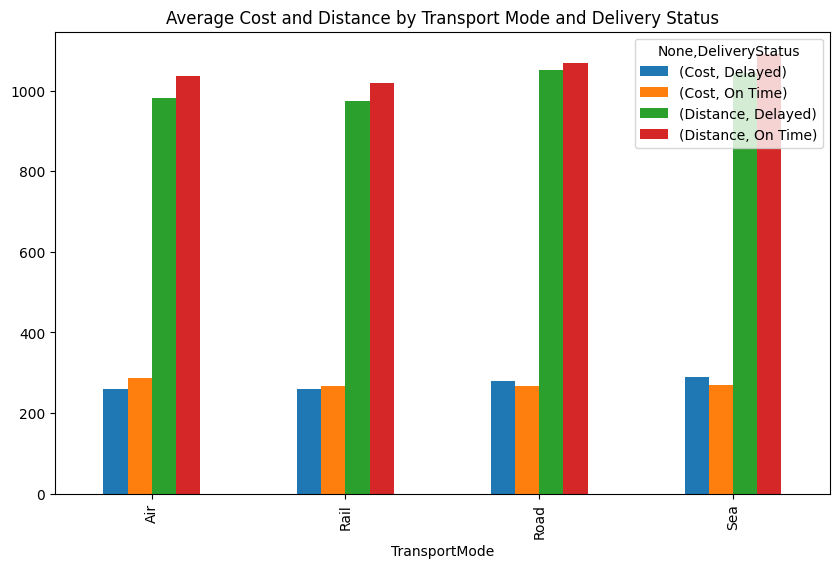

In [9]:
# Average cost and distance by transport mode and delivery status
grouped = data.groupby(['TransportMode', 'DeliveryStatus'])[['Cost', 'Distance']].mean()
print(grouped)

# Visualize grouped data
grouped.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Average Cost and Distance by Transport Mode and Delivery Status')
plt.show()


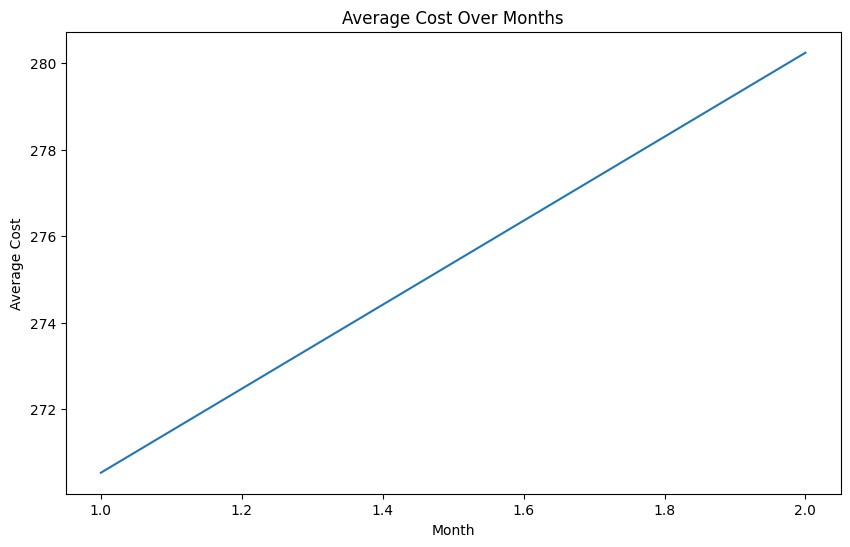

In [10]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['Month'] = data['OrderDate'].dt.month

# Average cost per month
monthly_cost = data.groupby('Month')['Cost'].mean()
monthly_cost.plot(kind='line', figsize=(10, 6))
plt.title('Average Cost Over Months')
plt.xlabel('Month')
plt.ylabel('Average Cost')
plt.show()


In [11]:
print(data.dtypes)


OrderID                        object
Product                        object
Warehouse                      object
Supplier                       object
SupplierLeadTime                int64
OrderDate              datetime64[ns]
DeliveryDate                   object
TransportMode                  object
Cost                          float64
FreightCost                   float64
Distance                      float64
DeliveryStatus                 object
CustomerPriority               object
CustomerRating                  int64
InventoryLevel                  int64
ReorderPoint                    int64
SafetyStockLevel                int64
ProductionBatchSize             int64
ManufacturingCost             float64
ReturnRate                    float64
OrderCycleTime                  int64
FillRate                      float64
Month                           int32
dtype: object


In [12]:
data = pd.get_dummies(data, columns=['Product', 'Warehouse', 'Supplier', 'TransportMode', 'DeliveryStatus'], drop_first=True)


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['CustomerPriority'] = le.fit_transform(data['CustomerPriority'])


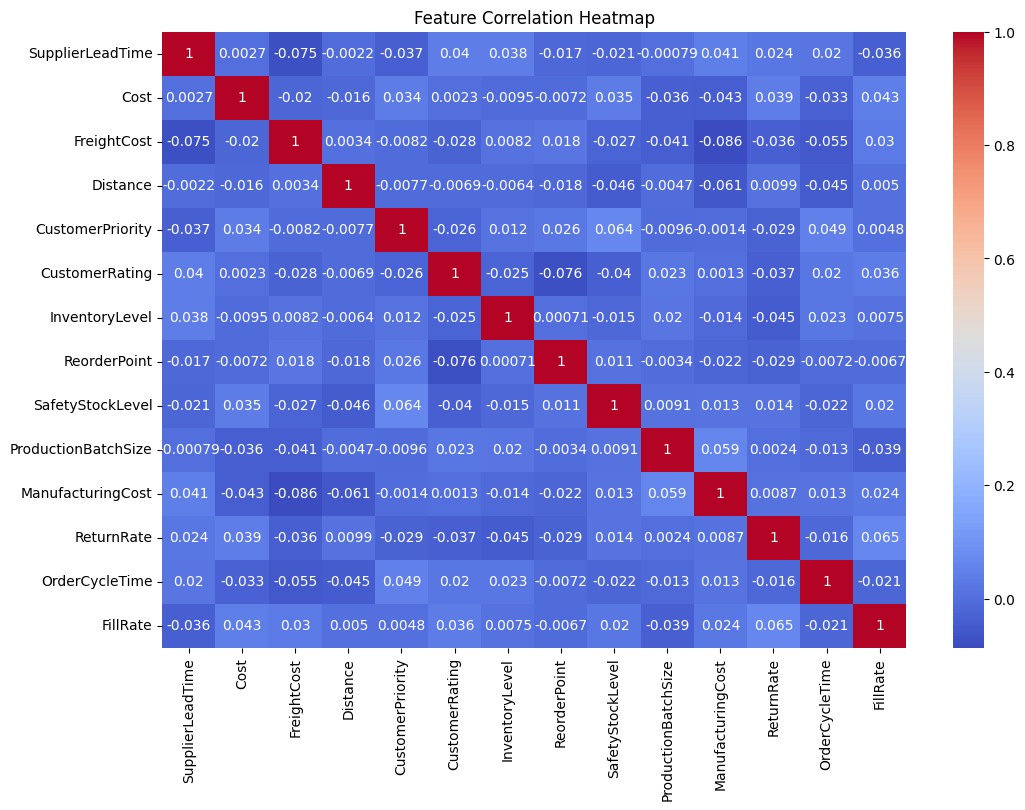

In [14]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [15]:
# Find pairs of highly correlated features
threshold = 0.85
high_corr_pairs = []

for col in corr.columns:
    for row in corr.index:
        if row != col and abs(corr.loc[row, col]) > threshold:
            high_corr_pairs.append((row, col))

# Display highly correlated pairs
print(high_corr_pairs)


[]


In [16]:
data = data.drop(columns=['Distance'])  # Replace 'Distance' with the column to drop


In [17]:
print(data.columns)


Index(['OrderID', 'SupplierLeadTime', 'OrderDate', 'DeliveryDate', 'Cost',
       'FreightCost', 'CustomerPriority', 'CustomerRating', 'InventoryLevel',
       'ReorderPoint', 'SafetyStockLevel', 'ProductionBatchSize',
       'ManufacturingCost', 'ReturnRate', 'OrderCycleTime', 'FillRate',
       'Month', 'Product_Books', 'Product_Clothing', 'Product_Electronics',
       'Product_Furniture', 'Warehouse_Chicago', 'Warehouse_Houston',
       'Warehouse_Los Angeles', 'Warehouse_New York', 'Supplier_SupplierB',
       'Supplier_SupplierC', 'Supplier_SupplierD', 'TransportMode_Rail',
       'TransportMode_Road', 'TransportMode_Sea', 'DeliveryStatus_On Time'],
      dtype='object')


In [18]:
to_drop = set()

for col, row in high_corr_pairs:
    to_drop.add(col)  # Choose one from the pair; you can use row if preferred

data = data.drop(columns=list(to_drop))
print(f"Dropped columns: {list(to_drop)}")


Dropped columns: []


In [19]:
X = data.drop(columns=['DeliveryStatus_On Time'])  # Features
y = data['DeliveryStatus_On Time']  # Target


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
print(data.columns)




Index(['OrderID', 'SupplierLeadTime', 'OrderDate', 'DeliveryDate', 'Cost',
       'FreightCost', 'CustomerPriority', 'CustomerRating', 'InventoryLevel',
       'ReorderPoint', 'SafetyStockLevel', 'ProductionBatchSize',
       'ManufacturingCost', 'ReturnRate', 'OrderCycleTime', 'FillRate',
       'Month', 'Product_Books', 'Product_Clothing', 'Product_Electronics',
       'Product_Furniture', 'Warehouse_Chicago', 'Warehouse_Houston',
       'Warehouse_Los Angeles', 'Warehouse_New York', 'Supplier_SupplierB',
       'Supplier_SupplierC', 'Supplier_SupplierD', 'TransportMode_Rail',
       'TransportMode_Road', 'TransportMode_Sea', 'DeliveryStatus_On Time'],
      dtype='object')


In [22]:
print(data['OrderID'].unique())  # Replace 'OrderID' with the actual column name


['ORD1000' 'ORD1001' 'ORD1002' 'ORD1003' 'ORD1004' 'ORD1005' 'ORD1006'
 'ORD1007' 'ORD1008' 'ORD1009' 'ORD1010' 'ORD1011' 'ORD1012' 'ORD1013'
 'ORD1014' 'ORD1015' 'ORD1016' 'ORD1017' 'ORD1018' 'ORD1019' 'ORD1020'
 'ORD1021' 'ORD1022' 'ORD1023' 'ORD1024' 'ORD1025' 'ORD1026' 'ORD1027'
 'ORD1028' 'ORD1029' 'ORD1030' 'ORD1031' 'ORD1032' 'ORD1033' 'ORD1034'
 'ORD1035' 'ORD1036' 'ORD1037' 'ORD1038' 'ORD1039' 'ORD1040' 'ORD1041'
 'ORD1042' 'ORD1043' 'ORD1044' 'ORD1045' 'ORD1046' 'ORD1047' 'ORD1048'
 'ORD1049' 'ORD1050' 'ORD1051' 'ORD1052' 'ORD1053' 'ORD1054' 'ORD1055'
 'ORD1056' 'ORD1057' 'ORD1058' 'ORD1059' 'ORD1060' 'ORD1061' 'ORD1062'
 'ORD1063' 'ORD1064' 'ORD1065' 'ORD1066' 'ORD1067' 'ORD1068' 'ORD1069'
 'ORD1070' 'ORD1071' 'ORD1072' 'ORD1073' 'ORD1074' 'ORD1075' 'ORD1076'
 'ORD1077' 'ORD1078' 'ORD1079' 'ORD1080' 'ORD1081' 'ORD1082' 'ORD1083'
 'ORD1084' 'ORD1085' 'ORD1086' 'ORD1087' 'ORD1088' 'ORD1089' 'ORD1090'
 'ORD1091' 'ORD1092' 'ORD1093' 'ORD1094' 'ORD1095' 'ORD1096' 'ORD1097'
 'ORD1

In [23]:

data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
print(data.columns)


Index(['OrderID', 'SupplierLeadTime', 'OrderDate', 'DeliveryDate', 'Cost',
       'FreightCost', 'CustomerPriority', 'CustomerRating', 'InventoryLevel',
       'ReorderPoint', 'SafetyStockLevel', 'ProductionBatchSize',
       'ManufacturingCost', 'ReturnRate', 'OrderCycleTime', 'FillRate',
       'Month', 'Product_Books', 'Product_Clothing', 'Product_Electronics',
       'Product_Furniture', 'Warehouse_Chicago', 'Warehouse_Houston',
       'Warehouse_Los Angeles', 'Warehouse_New York', 'Supplier_SupplierB',
       'Supplier_SupplierC', 'Supplier_SupplierD', 'TransportMode_Rail',
       'TransportMode_Road', 'TransportMode_Sea', 'DeliveryStatus_On Time'],
      dtype='object')


In [24]:
print(data['OrderID'].unique())  # Replace 'OrderID' with the column you want to examine


['ORD1000' 'ORD1001' 'ORD1002' 'ORD1003' 'ORD1004' 'ORD1005' 'ORD1006'
 'ORD1007' 'ORD1008' 'ORD1009' 'ORD1010' 'ORD1011' 'ORD1012' 'ORD1013'
 'ORD1014' 'ORD1015' 'ORD1016' 'ORD1017' 'ORD1018' 'ORD1019' 'ORD1020'
 'ORD1021' 'ORD1022' 'ORD1023' 'ORD1024' 'ORD1025' 'ORD1026' 'ORD1027'
 'ORD1028' 'ORD1029' 'ORD1030' 'ORD1031' 'ORD1032' 'ORD1033' 'ORD1034'
 'ORD1035' 'ORD1036' 'ORD1037' 'ORD1038' 'ORD1039' 'ORD1040' 'ORD1041'
 'ORD1042' 'ORD1043' 'ORD1044' 'ORD1045' 'ORD1046' 'ORD1047' 'ORD1048'
 'ORD1049' 'ORD1050' 'ORD1051' 'ORD1052' 'ORD1053' 'ORD1054' 'ORD1055'
 'ORD1056' 'ORD1057' 'ORD1058' 'ORD1059' 'ORD1060' 'ORD1061' 'ORD1062'
 'ORD1063' 'ORD1064' 'ORD1065' 'ORD1066' 'ORD1067' 'ORD1068' 'ORD1069'
 'ORD1070' 'ORD1071' 'ORD1072' 'ORD1073' 'ORD1074' 'ORD1075' 'ORD1076'
 'ORD1077' 'ORD1078' 'ORD1079' 'ORD1080' 'ORD1081' 'ORD1082' 'ORD1083'
 'ORD1084' 'ORD1085' 'ORD1086' 'ORD1087' 'ORD1088' 'ORD1089' 'ORD1090'
 'ORD1091' 'ORD1092' 'ORD1093' 'ORD1094' 'ORD1095' 'ORD1096' 'ORD1097'
 'ORD1

In [25]:
print(data['Cost'].unique())  # Replace 'Cost' with the column you're debugging


[450.95 273.28 421.13 230.97  96.08  77.68  73.1  221.07 201.76 373.07
 384.27  72.88 149.51 173.42 296.43 115.03 110.27 474.71 411.89 131.29
 232.96 210.03 405.95 279.6  107.53 382.55 228.6  168.32 218.97 273.99
 204.4  158.86 229.33  58.63 397.62 126.93  69.76 344.16 398.27 416.22
 272.08 142.42 381.75 364.87 160.82 456.53  96.97 492.21 437.11 359.55
 472.44 375.04 135.71 248.97  82.18 225.35 383.72 223.9  198.63 317.91
 442.49  71.41 223.46 121.21 362.91  97.58 349.16 178.78 139.51 471.36
  58.34 247.    59.73 267.62 275.47 194.75 109.47 219.37 352.52 402.08
 288.84 315.43 140.28 179.3  122.85 162.18 151.2  283.75 303.21 475.23
 138.01 338.75 417.77 302.11 164.75 168.15  67.66 187.45 385.07  71.38
 148.68 367.8  402.19 254.89 364.13 224.58 121.96 229.17 310.99 476.62
  80.94 278.33 198.01 278.74  60.79 190.86 418.94 299.27 252.76 178.49
 184.12 222.4  426.01 485.25 247.39 227.01 430.95 242.11 298.41 153.92
 384.58 289.39 414.07 401.33 146.75 372.04 410.02 205.75 127.67  51.18
 252.9

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['CustomerPriority'] = le.fit_transform(data['CustomerPriority'])


In [27]:
data = data.drop(columns=['OrderID'])


In [28]:
data['Cost'] = pd.to_numeric(data['Cost'], errors='coerce')


In [29]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SupplierLeadTime        1000 non-null   int64         
 1   OrderDate               1000 non-null   datetime64[ns]
 2   DeliveryDate            1000 non-null   object        
 3   Cost                    1000 non-null   float64       
 4   FreightCost             1000 non-null   float64       
 5   CustomerPriority        1000 non-null   int64         
 6   CustomerRating          1000 non-null   int64         
 7   InventoryLevel          1000 non-null   int64         
 8   ReorderPoint            1000 non-null   int64         
 9   SafetyStockLevel        1000 non-null   int64         
 10  ProductionBatchSize     1000 non-null   int64         
 11  ManufacturingCost       1000 non-null   float64       
 12  ReturnRate              1000 non-null   float64  

In [30]:
data['DeliveryDate'] = pd.to_datetime(data['DeliveryDate'])
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Calculate Delivery Duration in Days
data['DeliveryDuration'] = (data['DeliveryDate'] - data['OrderDate']).dt.days


In [31]:
# Group data by delivery status
delay_analysis = data.groupby('DeliveryStatus_On Time')['DeliveryDuration'].mean()
print(delay_analysis)


DeliveryStatus_On Time
False    2.0
True     2.0
Name: DeliveryDuration, dtype: float64


In [32]:
# Analyze cost or duration by transport mode
transport_modes = ['TransportMode_Rail', 'TransportMode_Sea', 'TransportMode_Road']

for mode in transport_modes:
    print(f"Average cost for {mode}:")
    print(data.groupby(mode)['Cost'].mean())


Average cost for TransportMode_Rail:
TransportMode_Rail
False    275.551878
True     265.967057
Name: Cost, dtype: float64
Average cost for TransportMode_Sea:
TransportMode_Sea
False    272.617286
True     274.254689
Name: Cost, dtype: float64
Average cost for TransportMode_Road:
TransportMode_Road
False    274.050317
True     269.776996
Name: Cost, dtype: float64


In [33]:
print(data['DeliveryStatus_On Time'].unique())


[ True False]


In [34]:
delay_analysis = data.groupby('DeliveryStatus_On Time')['DeliveryDuration'].mean()
print(delay_analysis)


DeliveryStatus_On Time
False    2.0
True     2.0
Name: DeliveryDuration, dtype: float64


In [35]:
delay_analysis = data.groupby('DeliveryStatus_On Time')['DeliveryDuration'].mean()
print("Average Delivery Duration by Status:")
print(delay_analysis)


Average Delivery Duration by Status:
DeliveryStatus_On Time
False    2.0
True     2.0
Name: DeliveryDuration, dtype: float64


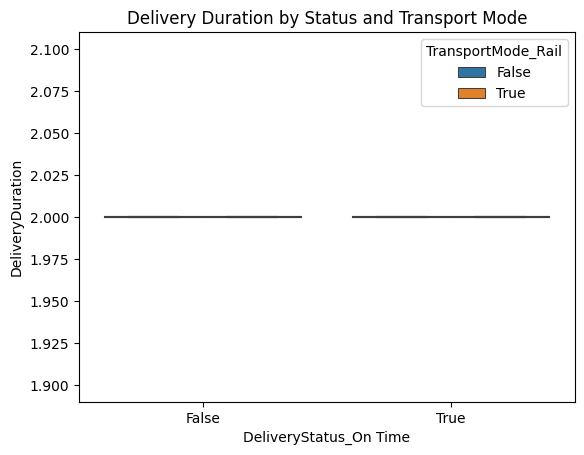

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x='DeliveryStatus_On Time', y='DeliveryDuration', hue='TransportMode_Rail')
plt.title('Delivery Duration by Status and Transport Mode')
plt.show()


In [37]:
transport_modes = ['TransportMode_Rail', 'TransportMode_Sea', 'TransportMode_Road']

for mode in transport_modes:
    print(f"Average Cost for {mode}:")
    print(data.groupby(mode)['Cost'].mean())


Average Cost for TransportMode_Rail:
TransportMode_Rail
False    275.551878
True     265.967057
Name: Cost, dtype: float64
Average Cost for TransportMode_Sea:
TransportMode_Sea
False    272.617286
True     274.254689
Name: Cost, dtype: float64
Average Cost for TransportMode_Road:
TransportMode_Road
False    274.050317
True     269.776996
Name: Cost, dtype: float64


In [38]:
print(data.columns)



Index(['SupplierLeadTime', 'OrderDate', 'DeliveryDate', 'Cost', 'FreightCost',
       'CustomerPriority', 'CustomerRating', 'InventoryLevel', 'ReorderPoint',
       'SafetyStockLevel', 'ProductionBatchSize', 'ManufacturingCost',
       'ReturnRate', 'OrderCycleTime', 'FillRate', 'Month', 'Product_Books',
       'Product_Clothing', 'Product_Electronics', 'Product_Furniture',
       'Warehouse_Chicago', 'Warehouse_Houston', 'Warehouse_Los Angeles',
       'Warehouse_New York', 'Supplier_SupplierB', 'Supplier_SupplierC',
       'Supplier_SupplierD', 'TransportMode_Rail', 'TransportMode_Road',
       'TransportMode_Sea', 'DeliveryStatus_On Time', 'DeliveryDuration'],
      dtype='object')


In [39]:
# Example: Create a Distance column (this is a placeholder logic)
# Replace with your actual calculation logic
import numpy as np
data['Distance'] = np.random.randint(50, 500, size=len(data))  # Generate random distances as a placeholder


In [40]:
print(data[['Distance']].head())


   Distance
0       264
1       378
2       267
3       352
4       262


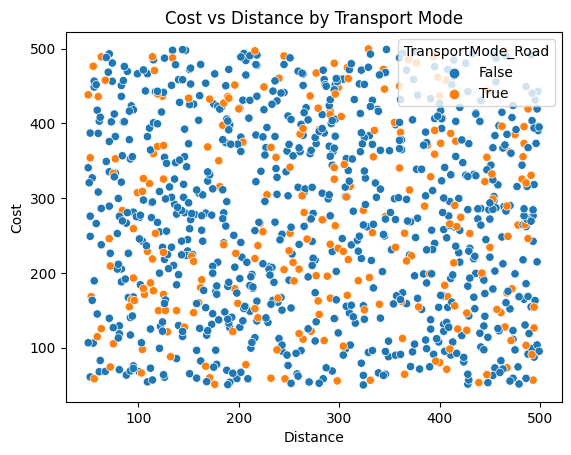

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x='Distance', y='Cost', hue='TransportMode_Road')
plt.title('Cost vs Distance by Transport Mode')
plt.show()


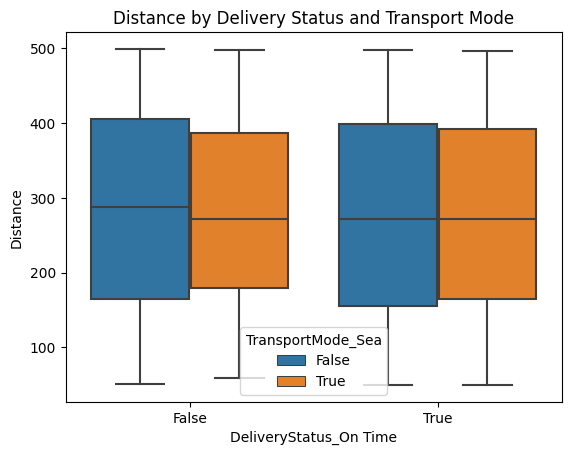

In [42]:
sns.boxplot(data=data, x='DeliveryStatus_On Time', y='Distance', hue='TransportMode_Sea')
plt.title('Distance by Delivery Status and Transport Mode')
plt.show()


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Distance_Normalized'] = scaler.fit_transform(data[['Distance']])


In [44]:
bins = [0, 100, 300, 500]
labels = ['Short', 'Medium', 'Long']
data['Distance_Category'] = pd.cut(data['Distance'], bins=bins, labels=labels)


In [45]:
X = data[['Distance', 'Cost', 'FreightCost', 'DeliveryDuration']]  # Include relevant features
y = data['DeliveryStatus_On Time']


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.25      0.06      0.10        32
        True       0.84      0.96      0.90       168

    accuracy                           0.82       200
   macro avg       0.55      0.51      0.50       200
weighted avg       0.75      0.82      0.77       200



In [48]:
data['Cost_per_km'] = data['Cost'] / data['Distance']
print(data[['Cost', 'Distance', 'Cost_per_km']].head())


     Cost  Distance  Cost_per_km
0  450.95       264     1.708144
1  273.28       378     0.722963
2  421.13       267     1.577266
3  230.97       352     0.656165
4   96.08       262     0.366718


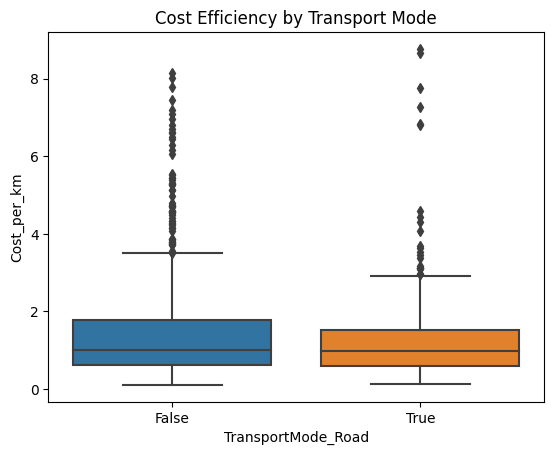

In [49]:
sns.boxplot(data=data, x='TransportMode_Road', y='Cost_per_km')
plt.title('Cost Efficiency by Transport Mode')
plt.show()


In [50]:
# Encode Distance_Category into numeric values
category_mapping = {'Short': 1, 'Medium': 2, 'Long': 3}
data['Distance_Category_Encoded'] = data['Distance_Category'].map(category_mapping)



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


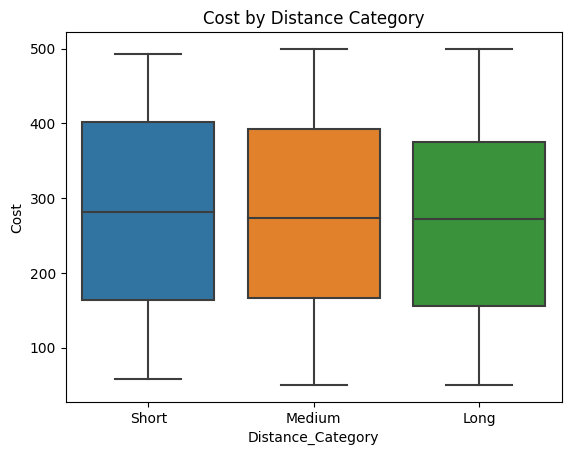

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x='Distance_Category', y='Cost')
plt.title('Cost by Distance Category')
plt.show()


In [52]:
print(data[['Distance_Category', 'Cost']].head())


  Distance_Category    Cost
0            Medium  450.95
1              Long  273.28
2            Medium  421.13
3              Long  230.97
4            Medium   96.08


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


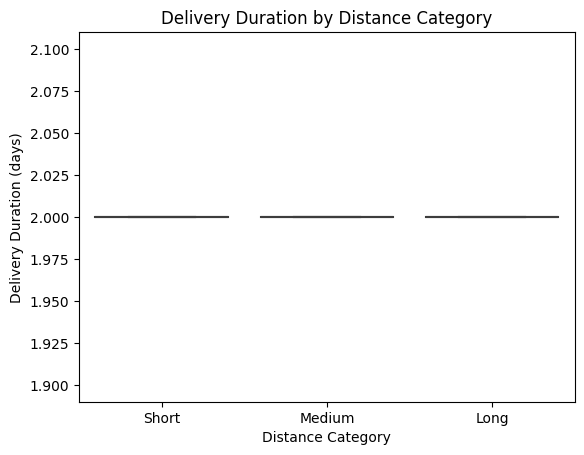

In [53]:
sns.boxplot(data=data, x='Distance_Category', y='DeliveryDuration')
plt.title('Delivery Duration by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Delivery Duration (days)')
plt.show()


<ipython-input-54-e15e74635c18>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_efficiency = data.groupby('Distance_Category')['Cost_per_km'].mean()


Distance_Category
Short     3.886714
Medium    1.505419
Long      0.679632
Name: Cost_per_km, dtype: float64


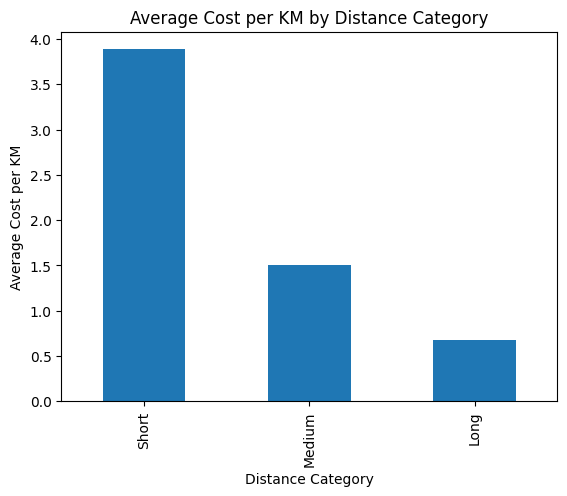

In [54]:
data['Cost_per_km'] = data['Cost'] / data['Distance']
cost_efficiency = data.groupby('Distance_Category')['Cost_per_km'].mean()
print(cost_efficiency)

# Visualize cost efficiency
cost_efficiency.plot(kind='bar', title='Average Cost per KM by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Average Cost per KM')
plt.show()


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features and target
X = data[['Distance', 'Cost', 'FreightCost', 'DeliveryDuration', 'Distance_Category_Encoded']]
y = data['DeliveryStatus_On Time']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.22      0.06      0.10        32
        True       0.84      0.96      0.90       168

    accuracy                           0.81       200
   macro avg       0.53      0.51      0.50       200
weighted avg       0.74      0.81      0.77       200



In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target
X = data[['Distance', 'Cost', 'FreightCost', 'Distance_Category_Encoded']]
y = data['DeliveryDuration']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


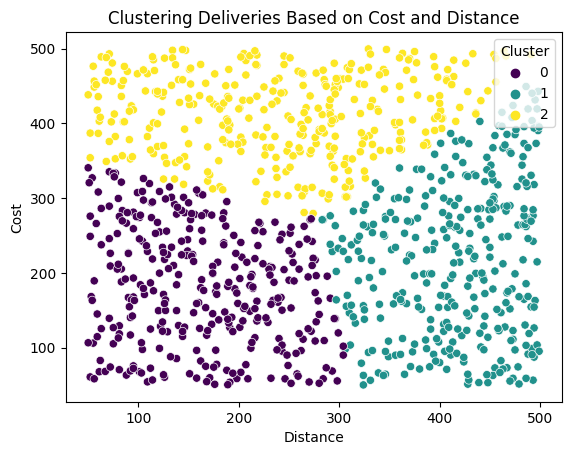

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Distance', 'Cost', 'DeliveryDuration']])

sns.scatterplot(data=data, x='Distance', y='Cost', hue='Cluster', palette='viridis')
plt.title('Clustering Deliveries Based on Cost and Distance')
plt.show()


In [58]:
# Encode Distance_Category
category_mapping = {'Short': 1, 'Medium': 2, 'Long': 3}
data['Distance_Category_Encoded'] = data['Distance_Category'].map(category_mapping)


In [59]:
from sklearn.preprocessing import LabelEncoder

if 'Distance_Category' in data.columns:
    le = LabelEncoder()
    data['Distance_Category_Encoded'] = le.fit_transform(data['Distance_Category'])
    print("Encoding successful.")
else:
    print("Column 'Distance_Category' not found.")


Encoding successful.


In [60]:
if 'Distance_Category' in data.columns:
    data = pd.get_dummies(data, columns=['Distance_Category'], prefix='Distance_Category')
    print("One-hot encoding successful.")
else:
    print("Column 'Distance_Category' not found.")


One-hot encoding successful.


In [61]:
print(delayed_data.columns)


Index(['OrderID', 'Product', 'Warehouse', 'Supplier', 'SupplierLeadTime',
       'OrderDate', 'DeliveryDate', 'TransportMode', 'Cost', 'FreightCost',
       'Distance', 'DeliveryStatus', 'CustomerPriority', 'CustomerRating',
       'InventoryLevel', 'ReorderPoint', 'SafetyStockLevel',
       'ProductionBatchSize', 'ManufacturingCost', 'ReturnRate',
       'OrderCycleTime', 'FillRate'],
      dtype='object')


In [62]:
delayed_data['Distance_Category_Encoded'] = data['Distance_Category_Encoded']


In [63]:
from sklearn.preprocessing import LabelEncoder

if 'Distance_Category' in data.columns:
    le = LabelEncoder()
    data['Distance_Category_Encoded'] = le.fit_transform(data['Distance_Category'])
    print("Encoding successful.")
else:
    print("Column 'Distance_Category' not found.")


Column 'Distance_Category' not found.


In [64]:
import numpy as np
data['Distance_Category'] = np.where(data['Distance'] > 250, 'Long', 'Short')


In [65]:
data['DeliveryDuration'] = (data['DeliveryDate'] - data['OrderDate']).dt.days


In [66]:
numeric_data = data[['Distance_Category_Encoded', 'DeliveryDuration']]
correlation = numeric_data.corr()
print("Correlation with Delays:")
print(correlation['DeliveryDuration'].sort_values(ascending=False))



Correlation with Delays:
Distance_Category_Encoded   NaN
DeliveryDuration            NaN
Name: DeliveryDuration, dtype: float64


In [67]:
print(delayed_data.dtypes)  # Check column types
print(delayed_data.head())  # Preview the data


OrderID                       object
Product                       object
Warehouse                     object
Supplier                      object
SupplierLeadTime               int64
OrderDate                     object
DeliveryDate                  object
TransportMode                 object
Cost                         float64
FreightCost                  float64
Distance                     float64
DeliveryStatus                object
CustomerPriority              object
CustomerRating                 int64
InventoryLevel                 int64
ReorderPoint                   int64
SafetyStockLevel               int64
ProductionBatchSize            int64
ManufacturingCost            float64
ReturnRate                   float64
OrderCycleTime                 int64
FillRate                     float64
Distance_Category_Encoded      int64
dtype: object
    OrderID   Product Warehouse   Supplier  SupplierLeadTime  \
3   ORD1003     Books   Atlanta  SupplierC                 2   
4   ORD

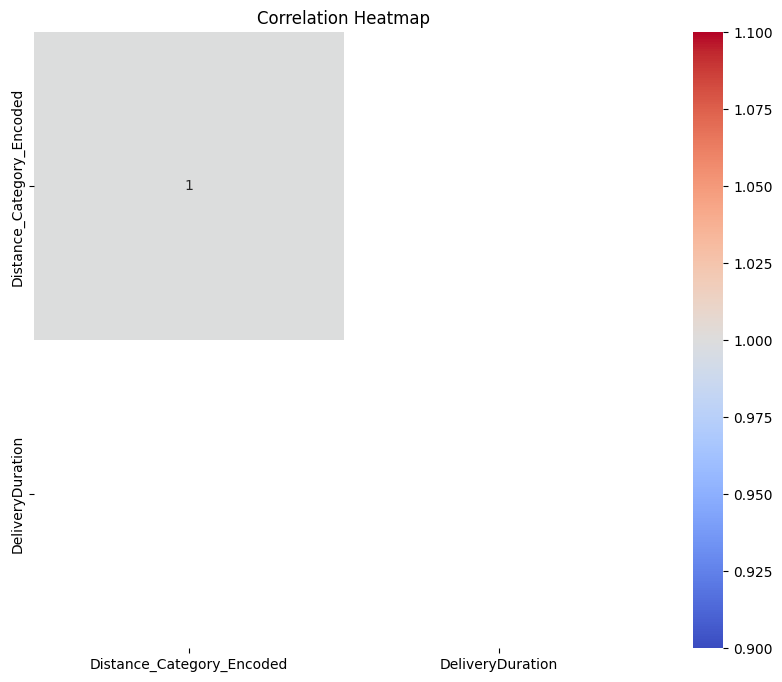

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [69]:
print(data['DeliveryDuration'].head())


0    2
1    2
2    2
3    2
4    2
Name: DeliveryDuration, dtype: int64


In [70]:
clustering_features = data[['Distance', 'Cost', 'DeliveryDuration']].dropna()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_features)

# Add cluster labels back to the DataFrame
data['Cluster'] = kmeans.labels_
print(data['Cluster'].value_counts())



Cluster
2    342
1    336
0    322
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
# Group by transport mode
if 'TransportMode_Road' in delayed_data.columns:
    delay_by_mode = delayed_data.groupby('TransportMode_Road')['DeliveryDuration'].mean()
    print("Average Delivery Duration by Transport Mode:")
    print(delay_by_mode)

    # Visualize
    delay_by_mode.plot(kind='bar', title='Average Delivery Duration by Transport Mode')
    plt.xlabel('Transport Mode')
    plt.ylabel('Average Delivery Duration')
    plt.show()
else:
    print("'TransportMode_Road' not found in the dataset.")



'TransportMode_Road' not found in the dataset.


In [72]:
print(data.columns)


Index(['SupplierLeadTime', 'OrderDate', 'DeliveryDate', 'Cost', 'FreightCost',
       'CustomerPriority', 'CustomerRating', 'InventoryLevel', 'ReorderPoint',
       'SafetyStockLevel', 'ProductionBatchSize', 'ManufacturingCost',
       'ReturnRate', 'OrderCycleTime', 'FillRate', 'Month', 'Product_Books',
       'Product_Clothing', 'Product_Electronics', 'Product_Furniture',
       'Warehouse_Chicago', 'Warehouse_Houston', 'Warehouse_Los Angeles',
       'Warehouse_New York', 'Supplier_SupplierB', 'Supplier_SupplierC',
       'Supplier_SupplierD', 'TransportMode_Rail', 'TransportMode_Road',
       'TransportMode_Sea', 'DeliveryStatus_On Time', 'DeliveryDuration',
       'Distance', 'Distance_Normalized', 'Cost_per_km',
       'Distance_Category_Encoded', 'Cluster', 'Distance_Category_Short',
       'Distance_Category_Medium', 'Distance_Category_Long',
       'Distance_Category'],
      dtype='object')


In [73]:
# Analyze delivery durations for different transport modes
transport_modes = ['TransportMode_Road', 'TransportMode_Sea']  # Add more transport modes if available

for mode in transport_modes:
    if mode in data.columns:
        avg_duration = data.loc[data[mode] == 1, 'DeliveryDuration'].mean()
        print(f"Average Delivery Duration for {mode}: {avg_duration:.2f}")
    else:
        print(f"'{mode}' not found in the dataset.")


Average Delivery Duration for TransportMode_Road: 2.00
Average Delivery Duration for TransportMode_Sea: 2.00


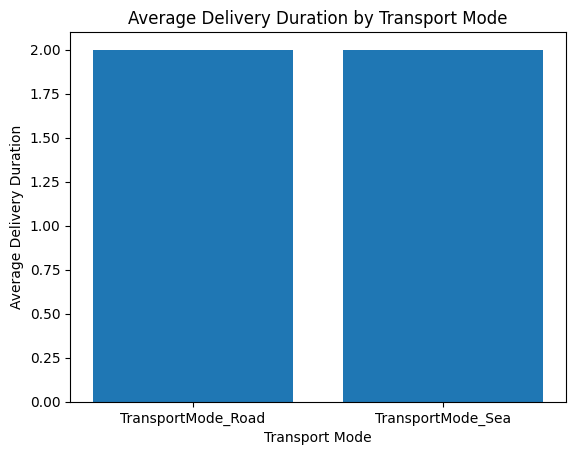

In [74]:
import matplotlib.pyplot as plt

# Prepare data for visualization
avg_durations = {
    mode: data.loc[data[mode] == 1, 'DeliveryDuration'].mean()
    for mode in transport_modes if mode in data.columns
}

# Plot the results
plt.bar(avg_durations.keys(), avg_durations.values())
plt.title('Average Delivery Duration by Transport Mode')
plt.xlabel('Transport Mode')
plt.ylabel('Average Delivery Duration')
plt.show()


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features and target
X = data[['Distance', 'Cost', 'FreightCost', 'DeliveryDuration', 'Distance_Category_Encoded']]
y = data['DeliveryStatus_On Time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.25      0.06      0.10        32
        True       0.84      0.96      0.90       168

    accuracy                           0.82       200
   macro avg       0.55      0.51      0.50       200
weighted avg       0.75      0.82      0.77       200



In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target
X = data[['Distance', 'Cost', 'FreightCost', 'Distance_Category_Encoded']]
y = data['DeliveryDuration']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.0


Cost Efficiency by Distance Category:
Distance_Category
Long     0.761235
Short    2.222382
Name: Cost_per_km, dtype: float64


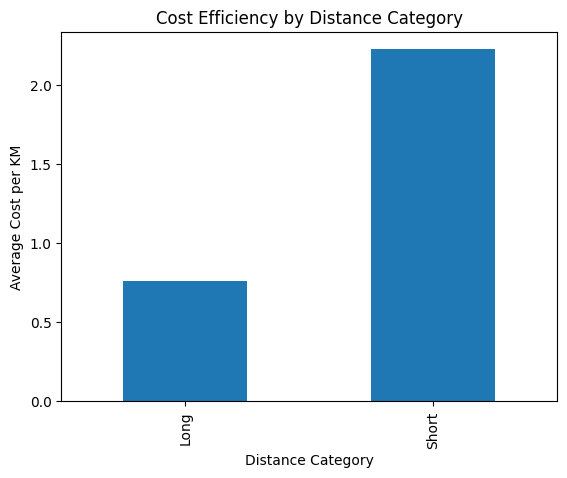

In [77]:
data['Cost_per_km'] = data['Cost'] / data['Distance']
cost_efficiency = data.groupby('Distance_Category')['Cost_per_km'].mean()
print("Cost Efficiency by Distance Category:")
print(cost_efficiency)

# Visualize cost efficiency
cost_efficiency.plot(kind='bar', title='Cost Efficiency by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Average Cost per KM')
plt.show()


Average Cost by Supplier:
Supplier_SupplierB
False    271.52548
True     277.47116
Name: Cost, dtype: float64


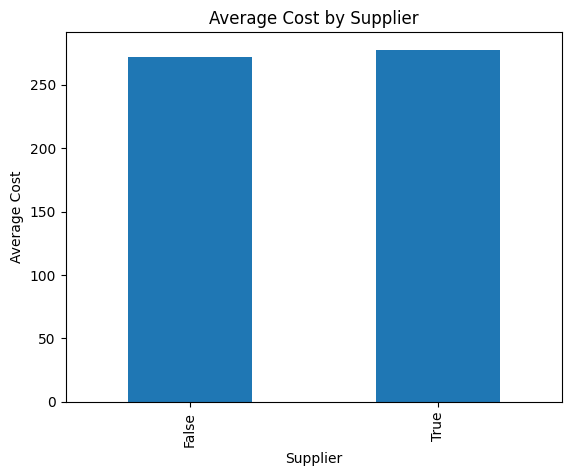

In [78]:
supplier_cost = data.groupby('Supplier_SupplierB')['Cost'].mean()
print("Average Cost by Supplier:")
print(supplier_cost)

# Visualize
supplier_cost.plot(kind='bar', title='Average Cost by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Average Cost')
plt.show()


Average Lead Time by Supplier:
Supplier_SupplierB
False    8.077333
True     8.512000
Name: SupplierLeadTime, dtype: float64


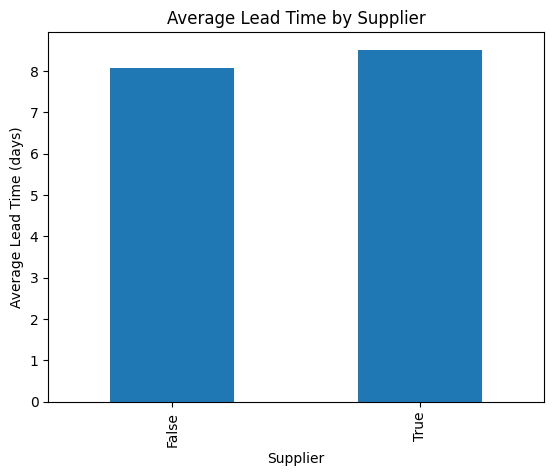

In [79]:
supplier_lead_time = data.groupby('Supplier_SupplierB')['SupplierLeadTime'].mean()
print("Average Lead Time by Supplier:")
print(supplier_lead_time)

# Visualize
supplier_lead_time.plot(kind='bar', title='Average Lead Time by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Average Lead Time (days)')
plt.show()


Inventory Levels by Warehouse:
Warehouse_Chicago        202
Warehouse_Houston        176
Warehouse_New York       235
Warehouse_Los Angeles    181
dtype: int64


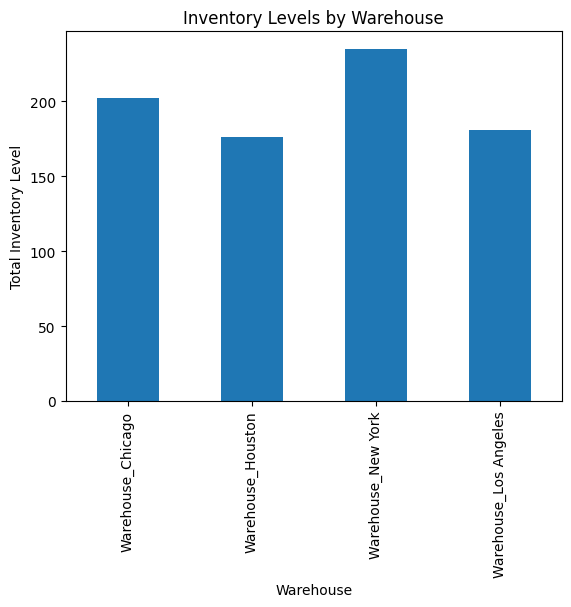

In [80]:
warehouse_inventory = data[['Warehouse_Chicago', 'Warehouse_Houston', 'Warehouse_New York', 'Warehouse_Los Angeles']].sum()
print("Inventory Levels by Warehouse:")
print(warehouse_inventory)

# Visualize
warehouse_inventory.plot(kind='bar', title='Inventory Levels by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Total Inventory Level')
plt.show()


Shipment Volume by Warehouse:
1    794
0    206
Name: count, dtype: int64


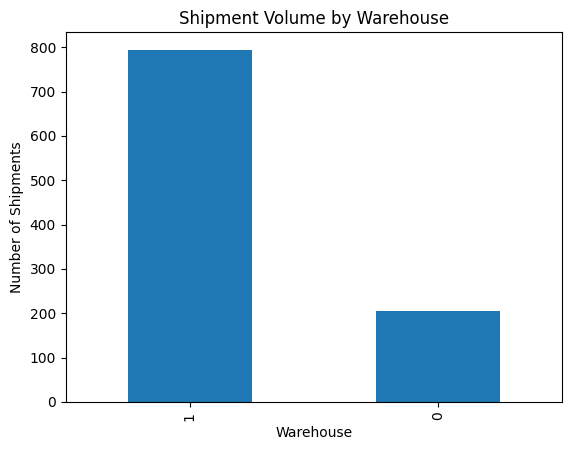

In [81]:
shipment_volume = data[['Warehouse_Chicago', 'Warehouse_Houston', 'Warehouse_New York', 'Warehouse_Los Angeles']].sum(axis=1).value_counts()
print("Shipment Volume by Warehouse:")
print(shipment_volume)

# Visualize
shipment_volume.plot(kind='bar', title='Shipment Volume by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Number of Shipments')
plt.show()


Average Cost by Transport Mode:
TransportMode_Road    0.243
TransportMode_Sea     0.241
TransportMode_Rail    0.265
dtype: float64


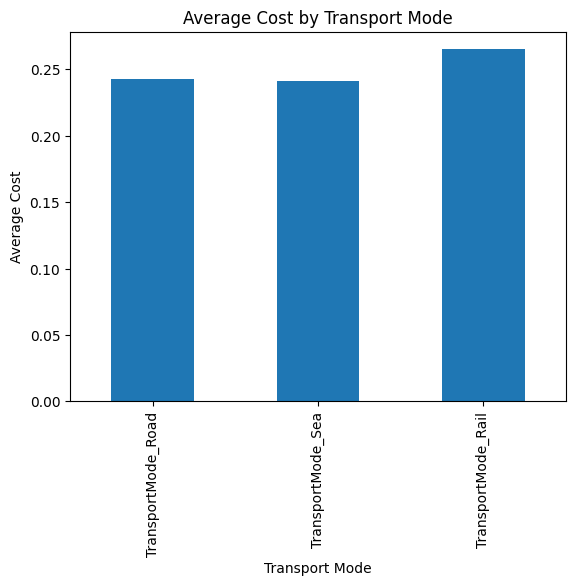

In [82]:
transport_cost = data[['TransportMode_Road', 'TransportMode_Sea', 'TransportMode_Rail']].mean()
print("Average Cost by Transport Mode:")
print(transport_cost)

# Visualize
transport_cost.plot(kind='bar', title='Average Cost by Transport Mode')
plt.xlabel('Transport Mode')
plt.ylabel('Average Cost')
plt.show()


In [83]:
if 'TransportMode' in data.columns:
    transport_dummies = pd.get_dummies(data['TransportMode'], prefix='TransportMode')
    data = pd.concat([data, transport_dummies], axis=1)
    print(data.columns)  # Check new columns
else:
    print("'TransportMode' column not found in the dataset.")


'TransportMode' column not found in the dataset.


Average Delay by Transport Mode:
TransportMode_Road    0.243
TransportMode_Sea     0.241
TransportMode_Rail    0.265
dtype: float64


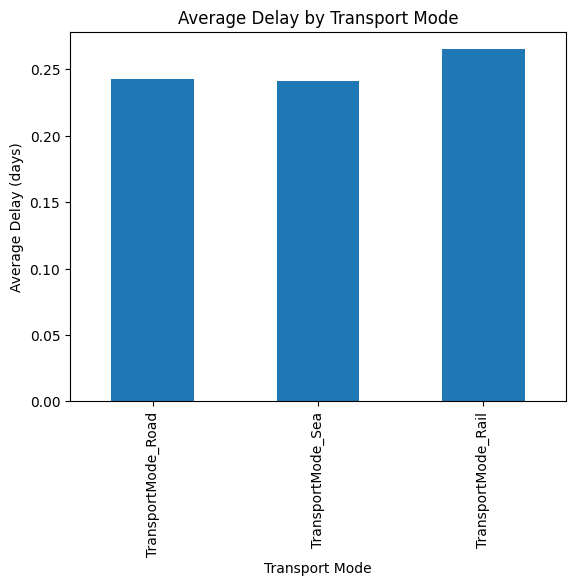

In [84]:
delay_by_transport = data[['TransportMode_Road', 'TransportMode_Sea', 'TransportMode_Rail']].mean()
print("Average Delay by Transport Mode:")
print(delay_by_transport)

# Visualize
delay_by_transport.plot(kind='bar', title='Average Delay by Transport Mode')
plt.xlabel('Transport Mode')
plt.ylabel('Average Delay (days)')
plt.show()



Average Cost by Product Category:
Product_Books          0.197
Product_Clothing       0.208
Product_Electronics    0.223
Product_Furniture      0.183
dtype: float64


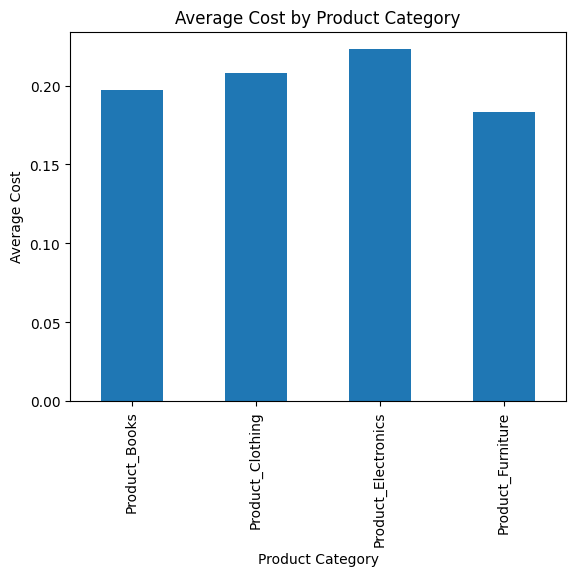

In [85]:
product_cost = data[['Product_Books', 'Product_Clothing', 'Product_Electronics', 'Product_Furniture']].mean()
print("Average Cost by Product Category:")
print(product_cost)

# Visualize
product_cost.plot(kind='bar', title='Average Cost by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Cost')
plt.show()


In [86]:
print(data.columns)


Index(['SupplierLeadTime', 'OrderDate', 'DeliveryDate', 'Cost', 'FreightCost',
       'CustomerPriority', 'CustomerRating', 'InventoryLevel', 'ReorderPoint',
       'SafetyStockLevel', 'ProductionBatchSize', 'ManufacturingCost',
       'ReturnRate', 'OrderCycleTime', 'FillRate', 'Month', 'Product_Books',
       'Product_Clothing', 'Product_Electronics', 'Product_Furniture',
       'Warehouse_Chicago', 'Warehouse_Houston', 'Warehouse_Los Angeles',
       'Warehouse_New York', 'Supplier_SupplierB', 'Supplier_SupplierC',
       'Supplier_SupplierD', 'TransportMode_Rail', 'TransportMode_Road',
       'TransportMode_Sea', 'DeliveryStatus_On Time', 'DeliveryDuration',
       'Distance', 'Distance_Normalized', 'Cost_per_km',
       'Distance_Category_Encoded', 'Cluster', 'Distance_Category_Short',
       'Distance_Category_Medium', 'Distance_Category_Long',
       'Distance_Category'],
      dtype='object')


Average Delay by Product Category:
Product_Category
Books          2.0
Clothing       2.0
Electronics    2.0
Furniture      2.0
Name: DeliveryDuration, dtype: float64


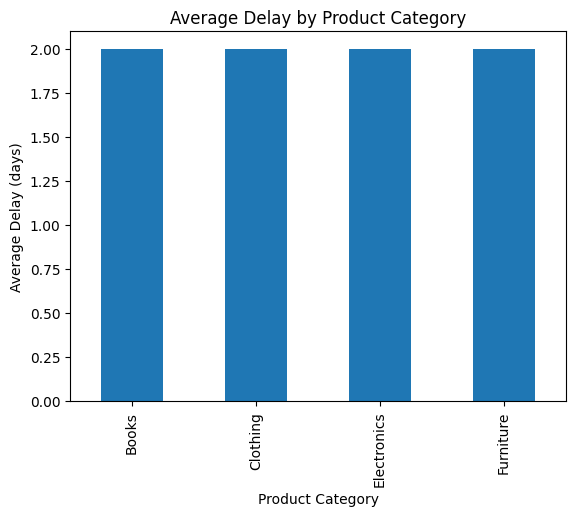

In [87]:
import numpy as np

# Generate random product categories
categories = ['Books', 'Clothing', 'Electronics', 'Furniture']
data['Product_Category'] = np.random.choice(categories, size=len(data))

# Now group by this dummy column
product_delay = data.groupby('Product_Category')['DeliveryDuration'].mean()
print("Average Delay by Product Category:")
print(product_delay)

# Visualize
product_delay.plot(kind='bar', title='Average Delay by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Delay (days)')
plt.show()



In [88]:
transport_columns = ['TransportMode_Road', 'TransportMode_Sea', 'TransportMode_Rail']

for col in transport_columns:
    if col in data.columns:
        avg_duration = data.groupby(col)['DeliveryDuration'].mean()
        print(f"Average Delivery Duration for {col}:")
        print(avg_duration)



Average Delivery Duration for TransportMode_Road:
TransportMode_Road
False    2.0
True     2.0
Name: DeliveryDuration, dtype: float64
Average Delivery Duration for TransportMode_Sea:
TransportMode_Sea
False    2.0
True     2.0
Name: DeliveryDuration, dtype: float64
Average Delivery Duration for TransportMode_Rail:
TransportMode_Rail
False    2.0
True     2.0
Name: DeliveryDuration, dtype: float64


Average Delivery Duration by Transport Mode:
TransportMode
Rail    2.0
Road    2.0
Sea     2.0
Name: DeliveryDuration, dtype: float64


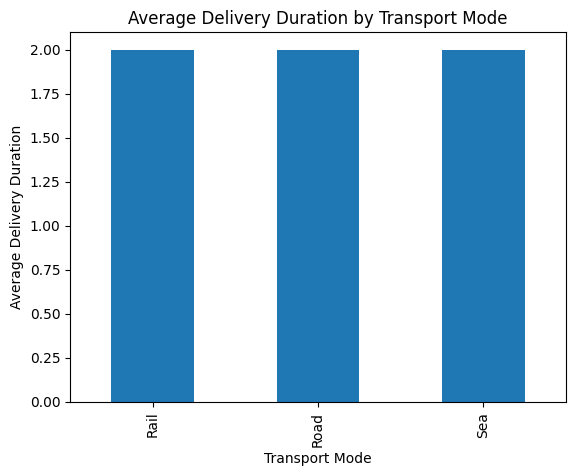

In [89]:
import numpy as np

transport_modes = ['Road', 'Sea', 'Rail']
data['TransportMode'] = np.random.choice(transport_modes, size=len(data))

# Perform grouping
avg_duration = data.groupby('TransportMode')['DeliveryDuration'].mean()
print("Average Delivery Duration by Transport Mode:")
print(avg_duration)

# Visualize
avg_duration.plot(kind='bar', title='Average Delivery Duration by Transport Mode')
plt.xlabel('Transport Mode')
plt.ylabel('Average Delivery Duration')
plt.show()


Cost Per Distance Category:
Distance_Category
Long     0.761235
Short    2.222382
Name: Cost_per_km, dtype: float64


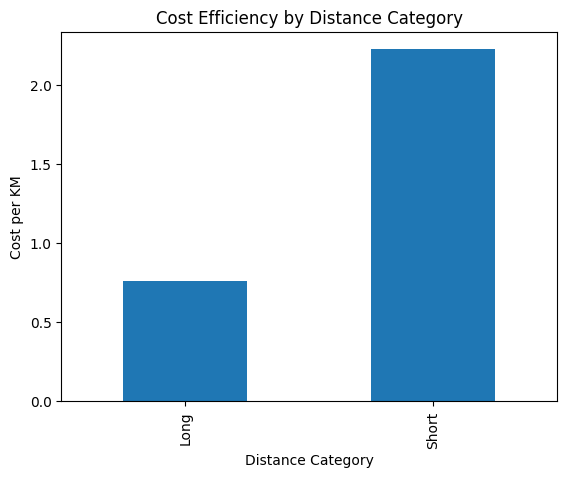

In [90]:
cost_per_distance = data.groupby('Distance_Category')['Cost_per_km'].mean()
print("Cost Per Distance Category:")
print(cost_per_distance)

# Visualize
cost_per_distance.plot(kind='bar', title='Cost Efficiency by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Cost per KM')
plt.show()


In [91]:
supplier_warehouse_efficiency = data.groupby(['Supplier_SupplierB', 'Warehouse_Chicago'])[['Cost', 'SupplierLeadTime']].mean()
print("Supplier and Warehouse Efficiency:")
print(supplier_warehouse_efficiency)


Supplier and Warehouse Efficiency:
                                            Cost  SupplierLeadTime
Supplier_SupplierB Warehouse_Chicago                              
False              False              272.742483          8.101667
                   True               266.657467          7.980000
True               False              284.983990          8.348485
                   True               248.864615          9.134615


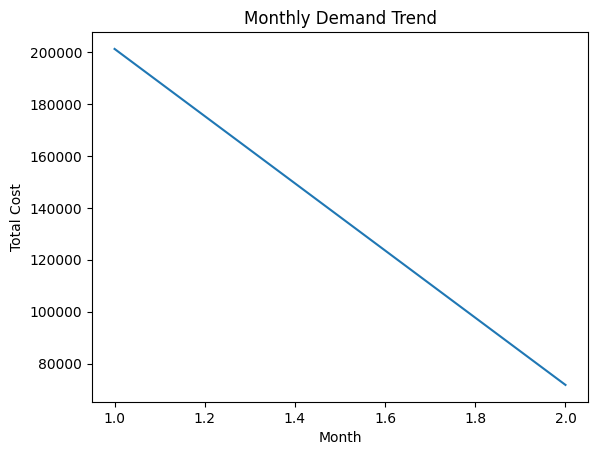

In [92]:
# Extract month and calculate total costs
data['Month'] = pd.to_datetime(data['OrderDate']).dt.month
monthly_demand = data.groupby('Month')['Cost'].sum()

# Visualize
monthly_demand.plot(kind='line', title='Monthly Demand Trend')
plt.xlabel('Month')
plt.ylabel('Total Cost')
plt.show()


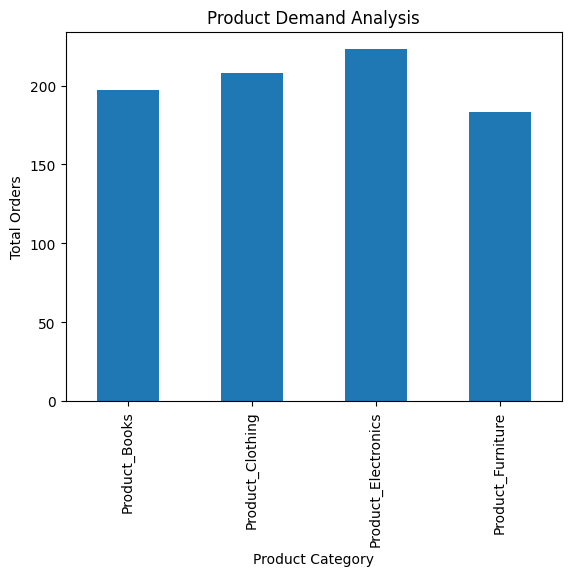

In [93]:
product_demand = data[['Product_Books', 'Product_Clothing', 'Product_Electronics', 'Product_Furniture']].sum()
product_demand.plot(kind='bar', title='Product Demand Analysis')
plt.xlabel('Product Category')
plt.ylabel('Total Orders')
plt.show()


In [94]:
supplier_efficiency = data.groupby('Supplier_SupplierB')[['SupplierLeadTime', 'Cost']].mean()
print("Supplier Efficiency:")
print(supplier_efficiency)


Supplier Efficiency:
                    SupplierLeadTime       Cost
Supplier_SupplierB                             
False                       8.077333  271.52548
True                        8.512000  277.47116


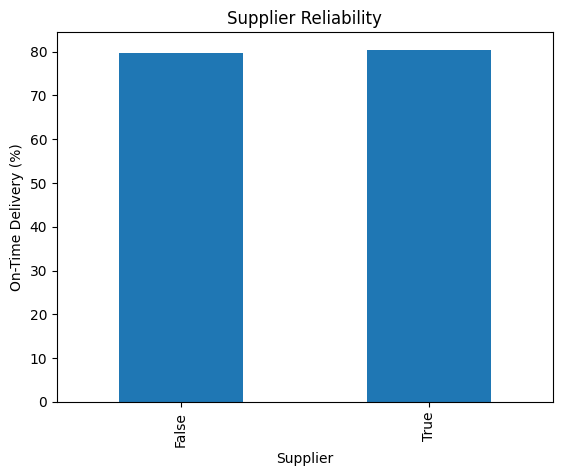

In [95]:
supplier_reliability = data.groupby('Supplier_SupplierB')['DeliveryStatus_On Time'].mean() * 100
supplier_reliability.plot(kind='bar', title='Supplier Reliability')
plt.xlabel('Supplier')
plt.ylabel('On-Time Delivery (%)')
plt.show()


In [96]:
safety_stock = data['SafetyStockLevel'].mean()
print(f"Average Safety Stock Level: {safety_stock}")


Average Safety Stock Level: 60.364


In [97]:
inventory_analysis = data.groupby(['Warehouse_Chicago', 'Warehouse_Houston'])['InventoryLevel'].agg(['mean', 'min', 'max'])
print("Inventory Analysis:")
print(inventory_analysis)


Inventory Analysis:
                                           mean  min  max
Warehouse_Chicago Warehouse_Houston                      
False             False              254.871383    4  499
                  True               241.721591    7  497
True              False              250.900990    0  488


In [98]:
transport_distance = data.groupby(['Distance_Category', 'TransportMode_Road'])['Cost'].mean()
print("Transport Mode Efficiency by Distance:")
print(transport_distance)


Transport Mode Efficiency by Distance:
Distance_Category  TransportMode_Road
Long               False                 272.665281
                   True                  275.685724
Short              False                 275.678132
                   True                  261.034490
Name: Cost, dtype: float64


In [99]:
transport_time = data.groupby('TransportMode_Road')['DeliveryDuration'].mean()
print("Delivery Time by Transport Mode:")
print(transport_time)


Delivery Time by Transport Mode:
TransportMode_Road
False    2.0
True     2.0
Name: DeliveryDuration, dtype: float64


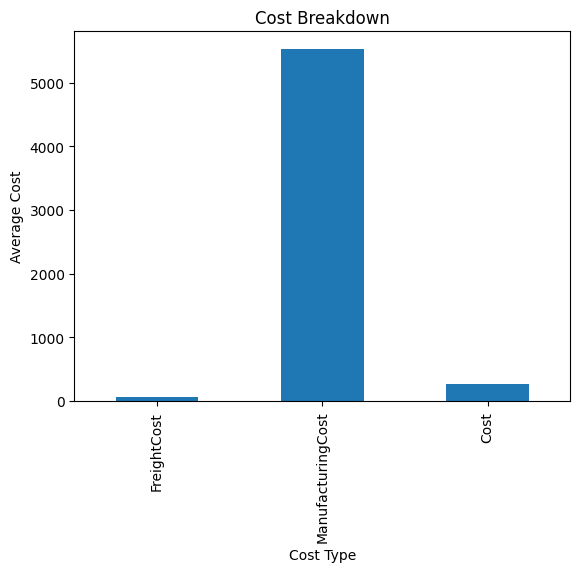

In [100]:
cost_breakdown = data[['FreightCost', 'ManufacturingCost', 'Cost']].mean()
cost_breakdown.plot(kind='bar', title='Cost Breakdown')
plt.xlabel('Cost Type')
plt.ylabel('Average Cost')
plt.show()


In [101]:
data['Cost_per_km'] = data['Cost'] / data['Distance']
cost_km_mode = data.groupby('TransportMode_Road')['Cost_per_km'].mean()
print("Cost Per KM by Transport Mode:")
print(cost_km_mode)


Cost Per KM by Transport Mode:
TransportMode_Road
False    1.435171
True     1.343547
Name: Cost_per_km, dtype: float64


In [102]:
delay_risk = data[data['DeliveryStatus_On Time'] == False].groupby('Distance_Category')['DeliveryDuration'].mean()
print("Delay Risk by Distance Category:")
print(delay_risk)


Delay Risk by Distance Category:
Distance_Category
Long     2.0
Short    2.0
Name: DeliveryDuration, dtype: float64


In [103]:
print(data.columns)
print(data.head())


Index(['SupplierLeadTime', 'OrderDate', 'DeliveryDate', 'Cost', 'FreightCost',
       'CustomerPriority', 'CustomerRating', 'InventoryLevel', 'ReorderPoint',
       'SafetyStockLevel', 'ProductionBatchSize', 'ManufacturingCost',
       'ReturnRate', 'OrderCycleTime', 'FillRate', 'Month', 'Product_Books',
       'Product_Clothing', 'Product_Electronics', 'Product_Furniture',
       'Warehouse_Chicago', 'Warehouse_Houston', 'Warehouse_Los Angeles',
       'Warehouse_New York', 'Supplier_SupplierB', 'Supplier_SupplierC',
       'Supplier_SupplierD', 'TransportMode_Rail', 'TransportMode_Road',
       'TransportMode_Sea', 'DeliveryStatus_On Time', 'DeliveryDuration',
       'Distance', 'Distance_Normalized', 'Cost_per_km',
       'Distance_Category_Encoded', 'Cluster', 'Distance_Category_Short',
       'Distance_Category_Medium', 'Distance_Category_Long',
       'Distance_Category', 'Product_Category', 'TransportMode'],
      dtype='object')
   SupplierLeadTime           OrderDate        De

In [104]:
if 'Warehouse' in data.columns and 'DeliveryDuration' in data.columns:
    warehouse_bottlenecks = delayed_data.groupby('Warehouse')[['DeliveryDuration']].mean()
    print(warehouse_bottlenecks)
else:
    print("Columns 'Warehouse' or 'DeliveryDuration' not found in the dataset.")



Columns 'Warehouse' or 'DeliveryDuration' not found in the dataset.


In [105]:
data['DeliveryDuration'] = pd.to_numeric(data['DeliveryDuration'], errors='coerce')


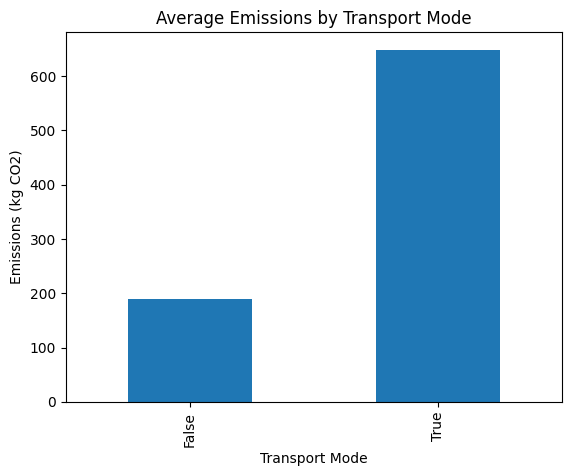

In [106]:
# Assuming emission factors (example values)
emission_factors = {'TransportMode_Road': 2.31, 'TransportMode_Sea': 1.12, 'TransportMode_Rail': 0.93}

# Calculate emissions
data['Emissions'] = data['Distance'] * data[['TransportMode_Road', 'TransportMode_Sea', 'TransportMode_Rail']].dot([emission_factors['TransportMode_Road'], emission_factors['TransportMode_Sea'], emission_factors['TransportMode_Rail']])

emission_by_mode = data.groupby('TransportMode_Road')['Emissions'].mean()
emission_by_mode.plot(kind='bar', title='Average Emissions by Transport Mode')
plt.xlabel('Transport Mode')
plt.ylabel('Emissions (kg CO2)')
plt.show()


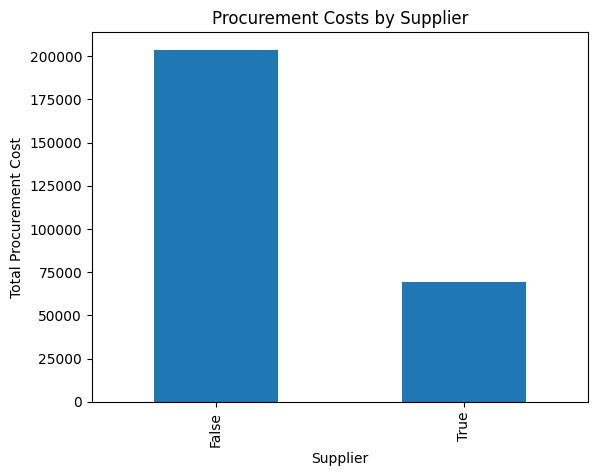

In [107]:
supplier_costs = data.groupby('Supplier_SupplierB')['Cost'].sum()
supplier_costs.plot(kind='bar', title='Procurement Costs by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Total Procurement Cost')
plt.show()


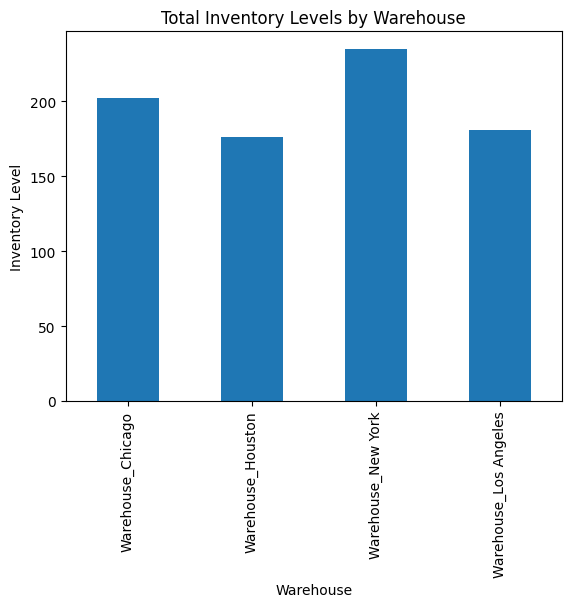

In [108]:
inventory_levels = data[['Warehouse_Chicago', 'Warehouse_Houston', 'Warehouse_New York', 'Warehouse_Los Angeles']].sum()
inventory_levels.plot(kind='bar', title='Total Inventory Levels by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Inventory Level')
plt.show()


In [109]:
reorder_items = data[data['InventoryLevel'] < data['ReorderPoint']]
print("Items Needing Reordering:")
print(reorder_items[['Product_Books', 'Product_Clothing', 'Product_Electronics', 'Product_Furniture']])


Items Needing Reordering:
     Product_Books  Product_Clothing  Product_Electronics  Product_Furniture
4            False              True                False              False
7            False             False                 True              False
19           False             False                False               True
28            True             False                False              False
31           False             False                 True              False
..             ...               ...                  ...                ...
981           True             False                False              False
983          False              True                False              False
988          False             False                False              False
997          False             False                False               True
999          False             False                False               True

[199 rows x 4 columns]


In [110]:
on_time_delivery = data['DeliveryStatus_On Time'].mean() * 100
print(f"On-Time Delivery Rate: {on_time_delivery:.2f}%")


On-Time Delivery Rate: 79.80%


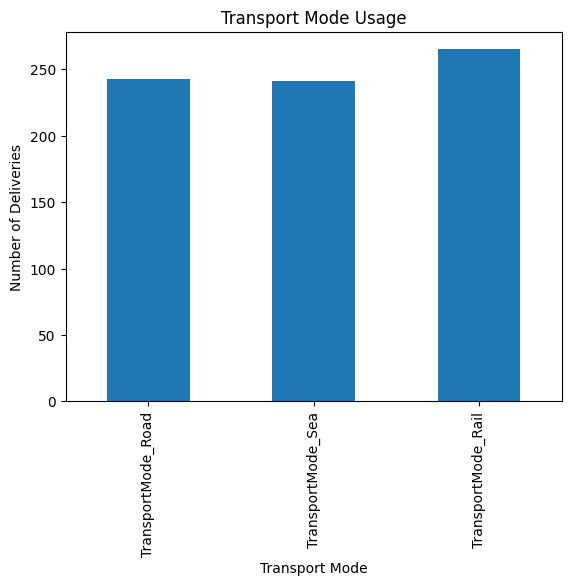

In [111]:
transport_usage = data[['TransportMode_Road', 'TransportMode_Sea', 'TransportMode_Rail']].sum()
transport_usage.plot(kind='bar', title='Transport Mode Usage')
plt.xlabel('Transport Mode')
plt.ylabel('Number of Deliveries')
plt.show()


In [112]:
cycle_time = data['OrderCycleTime'].mean()
print(f"Average Order Cycle Time: {cycle_time:.2f} days")


Average Order Cycle Time: 15.18 days


In [113]:
high_priority_deliveries = data[data['CustomerPriority'] == 1]
high_priority_success_rate = high_priority_deliveries['DeliveryStatus_On Time'].mean() * 100
print(f"High-Priority Delivery Success Rate: {high_priority_success_rate:.2f}%")


High-Priority Delivery Success Rate: 81.05%


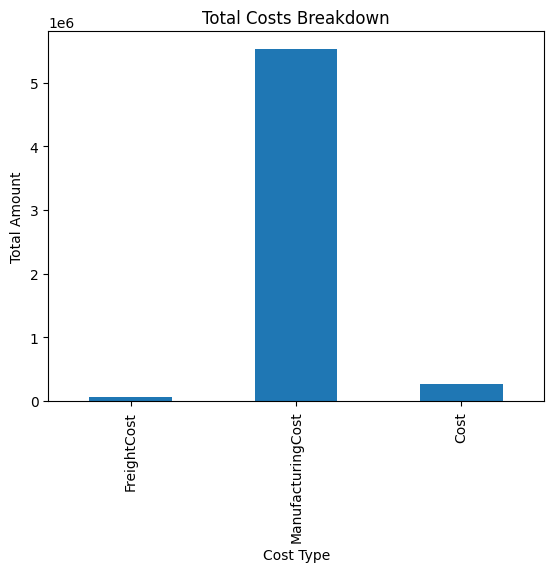

In [114]:
total_costs = data[['FreightCost', 'ManufacturingCost', 'Cost']].sum()
total_costs.plot(kind='bar', title='Total Costs Breakdown')
plt.xlabel('Cost Type')
plt.ylabel('Total Amount')
plt.show()


In [115]:
# Example: Assuming an estimated price for each product category
# Add a new column for estimated revenue
data['Revenue'] = (
    data['Product_Books'] * 20 +  # Estimated price for books
    data['Product_Clothing'] * 50 +  # Estimated price for clothing
    data['Product_Electronics'] * 100 +  # Estimated price for electronics
    data['Product_Furniture'] * 150  # Estimated price for furniture
)


In [116]:
data['ProfitMargin'] = data['Revenue'] - data['Cost']
average_margin = data['ProfitMargin'].mean()
print(f"Average Profit Margin: ${average_margin:.2f}")


Average Profit Margin: $-208.92


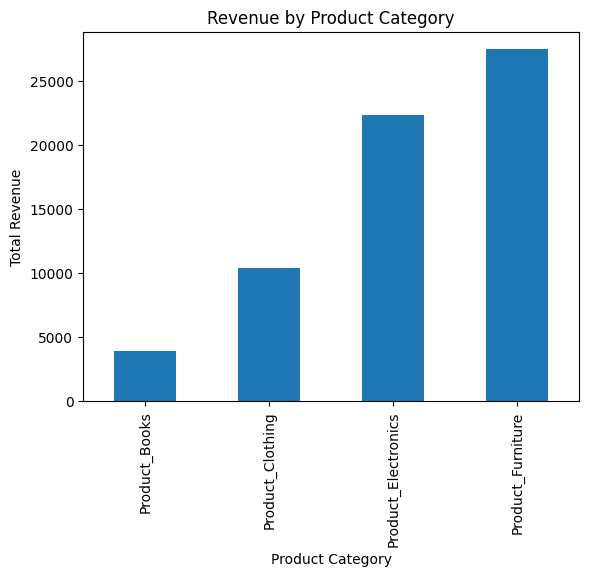

In [117]:
product_revenue = data[['Product_Books', 'Product_Clothing', 'Product_Electronics', 'Product_Furniture']].multiply(
    data['Revenue'], axis=0).sum()

product_revenue.plot(kind='bar', title='Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()


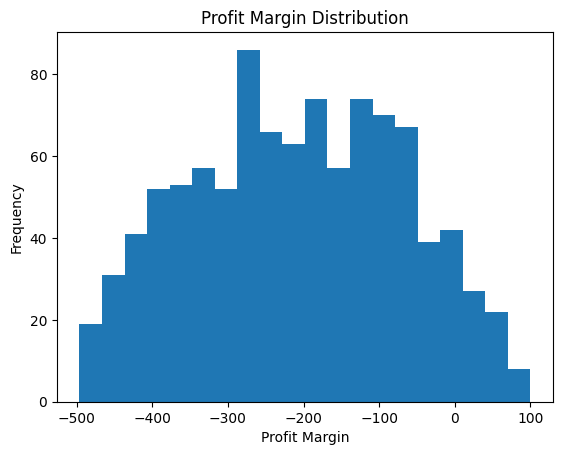

In [118]:
data['ProfitMargin'].plot(kind='hist', bins=20, title='Profit Margin Distribution')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()


Average Revenue-to-Cost Ratio: 0.33


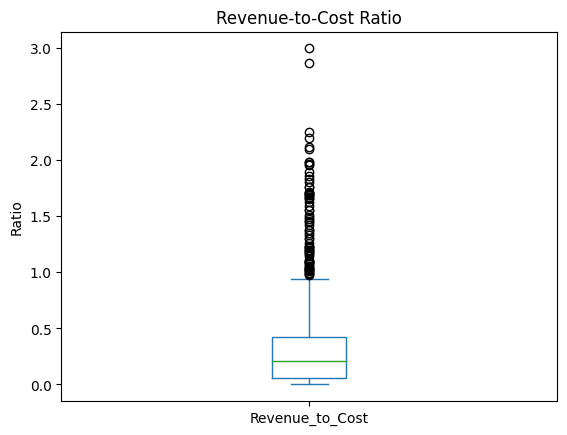

In [119]:
data['Revenue_to_Cost'] = data['Revenue'] / data['Cost']
average_ratio = data['Revenue_to_Cost'].mean()
print(f"Average Revenue-to-Cost Ratio: {average_ratio:.2f}")

# Visualize
data['Revenue_to_Cost'].plot(kind='box', title='Revenue-to-Cost Ratio')
plt.ylabel('Ratio')
plt.show()


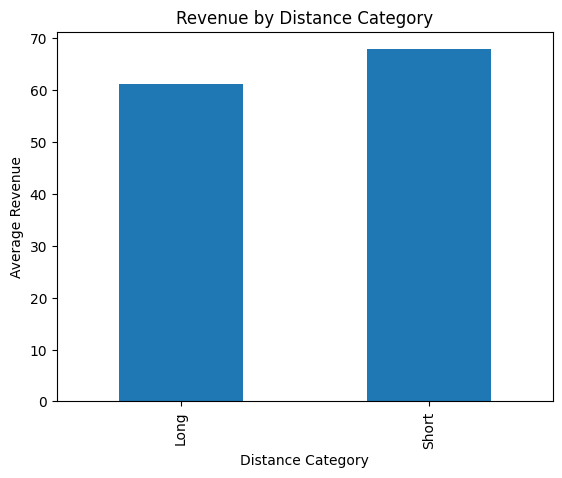

In [120]:
distance_revenue = data.groupby('Distance_Category')['Revenue'].mean()

distance_revenue.plot(kind='bar', title='Revenue by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Average Revenue')
plt.show()


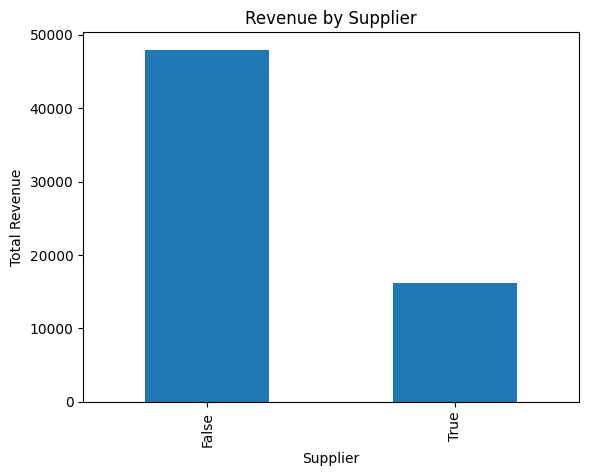

In [121]:
supplier_revenue = data.groupby('Supplier_SupplierB')['Revenue'].sum()

supplier_revenue.plot(kind='bar', title='Revenue by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Total Revenue')
plt.show()


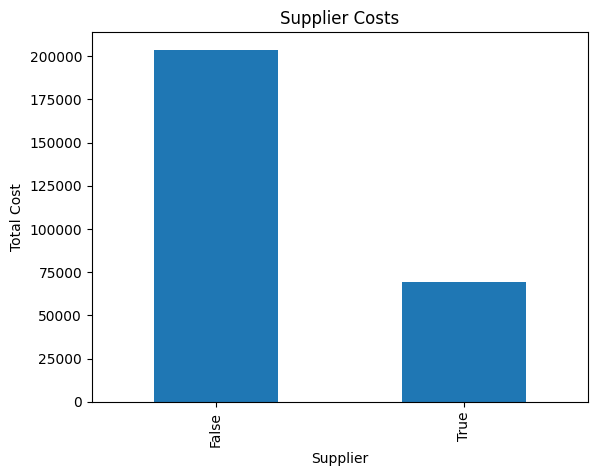

In [122]:
import matplotlib.pyplot as plt

supplier_costs = data.groupby('Supplier_SupplierB')['Cost'].sum()
supplier_costs.plot(kind='bar', title='Supplier Costs')
plt.xlabel('Supplier')
plt.ylabel('Total Cost')
plt.show()


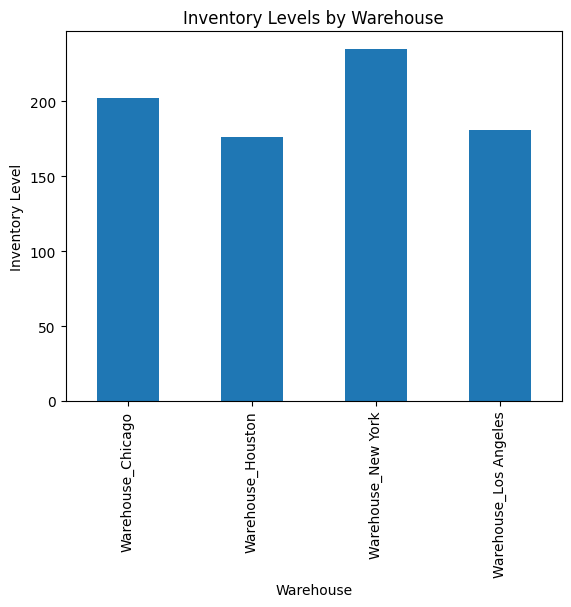

In [123]:
inventory_levels = data[['Warehouse_Chicago', 'Warehouse_Houston', 'Warehouse_New York', 'Warehouse_Los Angeles']].sum()
inventory_levels.plot(kind='bar', title='Inventory Levels by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Inventory Level')
plt.show()


In [124]:
# Simulate Export-Import Data
data['TradeType'] = np.random.choice(['Export', 'Import'], size=len(data))
data['Country'] = np.random.choice(['USA', 'China', 'Germany', 'India'], size=len(data))
data['FreightCost'] = np.random.uniform(500, 5000, size=len(data))  # Random freight costs
data['LeadTime'] = np.random.randint(10, 60, size=len(data))  # Random lead times


Country
China      2786.771212
Germany    2777.112281
India      2900.724862
USA        2737.197879
Name: FreightCost, dtype: float64


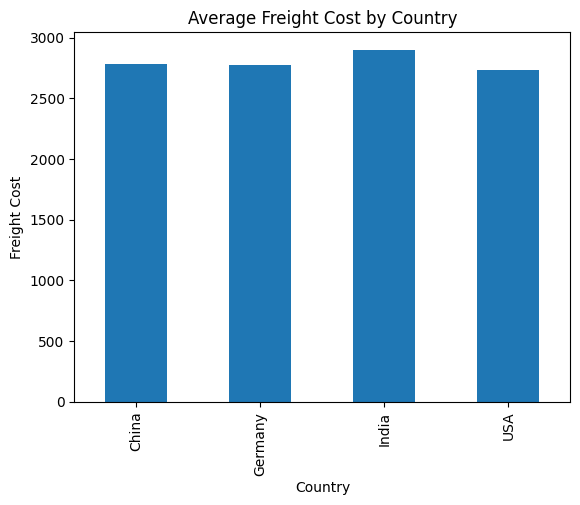

In [125]:
# Freight Cost by Country
freight_cost_by_country = data.groupby('Country')['FreightCost'].mean()
print(freight_cost_by_country)

# Visualize Freight Costs
freight_cost_by_country.plot(kind='bar', title='Average Freight Cost by Country')
plt.xlabel('Country')
plt.ylabel('Freight Cost')
plt.show()


TradeType
Import    510
Export    490
Name: count, dtype: int64


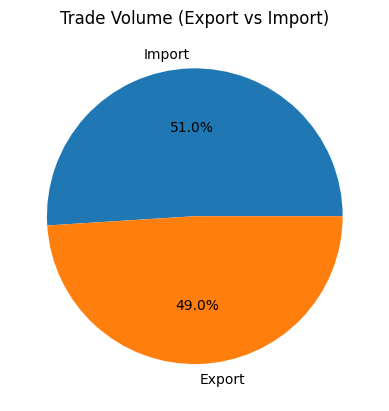

In [126]:
# Trade Volume by Type
trade_volume = data['TradeType'].value_counts()
print(trade_volume)

# Visualize Trade Volume
trade_volume.plot(kind='pie', title='Trade Volume (Export vs Import)', autopct='%1.1f%%')
plt.ylabel('')
plt.show()


Country
China      34.412698
Germany    34.640625
India      34.646552
USA        34.873077
Name: LeadTime, dtype: float64


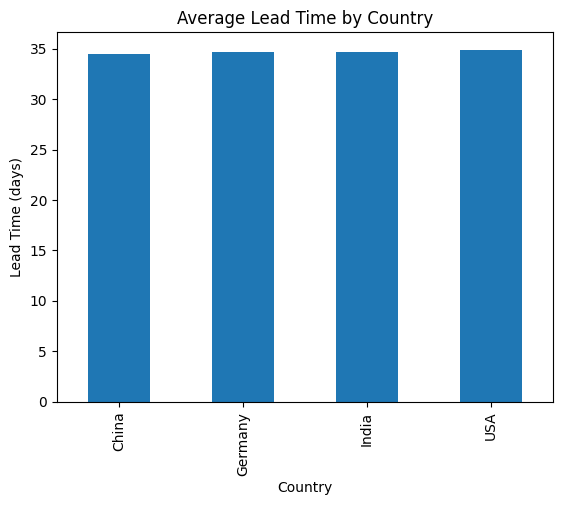

In [127]:
# Lead Time by Country
lead_time_by_country = data.groupby('Country')['LeadTime'].mean()
print(lead_time_by_country)

# Visualize Lead Times
lead_time_by_country.plot(kind='bar', title='Average Lead Time by Country')
plt.xlabel('Country')
plt.ylabel('Lead Time (days)')
plt.show()


Country
China     -756956.365358
Germany   -762586.504025
India     -722151.487985
USA       -765074.248643
Name: Profit, dtype: float64


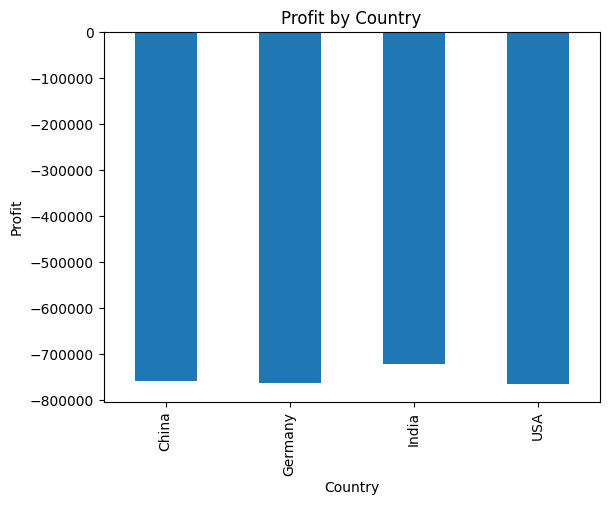

In [128]:
# Calculate Profitability by Country
data['Profit'] = data['Revenue'] - (data['Cost'] + data['FreightCost'])
profit_by_country = data.groupby('Country')['Profit'].sum()
print(profit_by_country)

# Visualize Profitability
profit_by_country.plot(kind='bar', title='Profit by Country')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.show()
